In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/HR_comma_sep.csv')
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
13548,0.65,0.37,3,170,6,0,0,0,IT,low
9352,0.32,0.74,6,205,3,0,0,0,technical,low
10557,0.81,0.75,5,101,5,0,0,0,sales,medium
10993,0.80,0.71,4,161,4,0,0,0,IT,low
14449,0.43,0.53,2,146,3,0,1,0,marketing,low


In [3]:
#now we have data of company , we need to find employee left the company or not using above data
# step 1 : we need to find essensial dataset and reduce dimension of data
#here left is target variable(1-left,0-notleft)
df.shape

(14999, 10)

In [4]:
#data exploration and visualization
left = df[df.left== 1]

In [5]:
left.shape

(3571, 10)

In [6]:
stay = df[df.left==0]
stay.shape

(11428, 10)

In [7]:
#to find whic columns are deciding left  or not we can make mean like this
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
#here we can clearly observed the following
# satisfaction_level low for person who left (44%)
# avg monthly hours is high for person who left (207<199)\
#time spend are already covered in avg monthly hours
#prmotion  last 5yers was very low for members who left
#1.satisfaction_level, 2.aveg monthly hours, 3.promotion last 5 yrs
df.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
4827,0.74,0.83,4,170,2,0,0,0,sales,low
3493,0.63,0.80,3,243,3,0,0,0,technical,medium
11777,0.34,0.72,3,118,4,0,0,0,IT,low


In [11]:
#in above method we only identify numerical data coulums, now we also need to findout department and salary column
# for textual data like this we can visualize
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

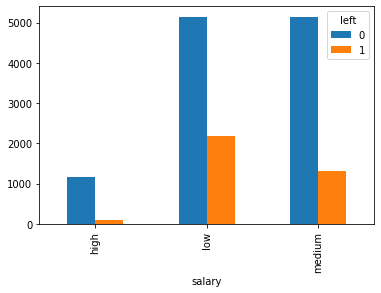

In [12]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

In [13]:
#so now we can say people having high salary are stat and others are lefft
# now lets check department wise
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

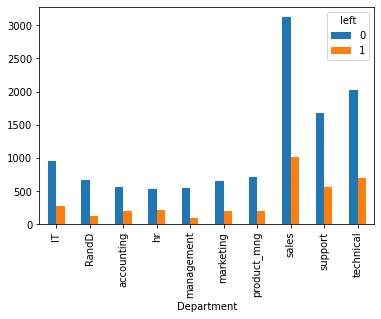

In [34]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

In [15]:
#all department have lefting persons. so we cant particulary decide by this
'''
From the above data analysis, we can say 
the prime factors decide a employee left or not is
1.satisfaction_level, 
2.aveg monthly hours, 
3.promotion last 5 yrs
4.salary
'''

'\nFrom the above data analysis, we can say \nthe prime factors decide a employee left or not is\n1.satisfaction_level, \n2.aveg monthly hours, \n3.promotion last 5 yrs\n4.salary\n'

In [35]:
main_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
main_df.sample(4)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
9806,0.66,192,0,low
10842,0.71,226,0,low
2745,0.58,218,0,low
2326,0.56,212,0,medium


In [36]:
#here salary is categorical data , to encode category into numbers we have 3 methods
# 1.label encoder
# 2.onehot encoder
# 3.dummyvariabel

# here we use dummy varibal
salary_dummies = pd.get_dummies(main_df.salary, prefix="salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [42]:
df_withdummies=pd.concat([main_df,salary_dummies],axis=1)
df_withdummies
#now we dont need salary column

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [43]:
df_withdummies.drop('salary',axis=1,inplace=True)

In [45]:
features = df_withdummies
features

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [46]:
target = df.left
target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [50]:
#spliting process
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=63)

In [52]:
print("Shapes")
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("X_test :",X_test.shape)
print("y_test :",y_test.shape)

Shapes
X_train : (10499, 6)
y_train : (10499,)
X_test : (4500, 6)
y_test : (4500,)


In [54]:
#training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [56]:
#prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [57]:
model.score(X_test,y_test)

0.7688888888888888